# Data Exploration

This notebook is meant to be a template for explorion of the data collected from trials.

### Please duplicate the notebook to start your work and keep the template intact.

## Before running the notebook
The trial datastore process must be started prior to running the notebook. Make sure you open a terminal, activate the .venv environment, run:
```
python -m launch_local_services
```

Once you are done with working in this notebook, close the terminal window.

## Cogment Setup

In [1]:
import os
import sys

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), "../"))
sys.path.append(ROOT_DIR)

from cogment_verse.utils.generate import generate
from cogment_verse.app import SPEC_FILEPATH

WORK_DIR = os.path.join(ROOT_DIR, ".cogment_verse")

generate(WORK_DIR, SPEC_FILEPATH)

/home/william/dev/cogment-verse/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import asyncio
import functools
import re
from dataclasses import dataclass, field
from datetime import datetime
from typing import List

import cogment
import numpy as np
import pandas as pd
from cogment.control import TrialState
from tabulate import tabulate

import gymnasium


from cogment_verse.specs import (
    AgentConfig,
    cog_settings,
    EnvironmentConfig,
    EnvironmentSpecs,
    HUMAN_ACTOR_IMPL,
    PLAYER_ACTOR_CLASS,
    TEACHER_ACTOR_CLASS,
    WEB_ACTOR_NAME,
)
from cogment_verse.specs.ndarray_serialization import deserialize_ndarray, serialize_ndarray


TRIAL_DATASTORE_ENDPOINT = "grpc://localhost:9001"

In [3]:
from pettingzoo.mpe import simple_tag_v3

env = simple_tag_v3.env(
    num_good=2,
    num_adversaries=2,
    num_obstacles=2,
    max_cycles=25,
    continuous_actions=False,
    render_mode="rgb_array",
)

env.reset()

In [4]:
print(env.agents)
print(env.num_agents)
print(env.observation_space("agent_0"))
print(env.action_space("agent_0"))

['adversary_0', 'adversary_1', 'agent_0', 'agent_1']
4
Box(-inf, inf, (16,), float32)
Discrete(5)


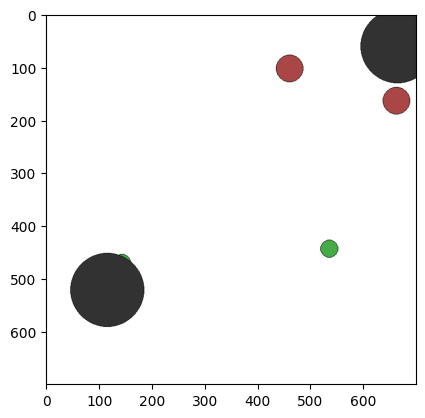

In [5]:
import matplotlib.pyplot as plt

rendered_frame = env.render()

plt.imshow(rendered_frame)

agent: adversary_0 | observation: (18,) | action: 3
agent: adversary_1 | observation: (18,) | action: 3
agent: agent_0 | observation: (16,) | action: 4
agent: agent_1 | observation: (16,) | action: 2
agent: adversary_0 | observation: (18,) | action: 3
agent: adversary_1 | observation: (18,) | action: 3
agent: agent_0 | observation: (16,) | action: 2
agent: agent_1 | observation: (16,) | action: 4
agent: adversary_0 | observation: (18,) | action: 1
agent: adversary_1 | observation: (18,) | action: 4
agent: agent_0 | observation: (16,) | action: 0
agent: agent_1 | observation: (16,) | action: 1
agent: adversary_0 | observation: (18,) | action: 2
agent: adversary_1 | observation: (18,) | action: 4
agent: agent_0 | observation: (16,) | action: 1
agent: agent_1 | observation: (16,) | action: 4
agent: adversary_0 | observation: (18,) | action: 0
agent: adversary_1 | observation: (18,) | action: 4
agent: agent_0 | observation: (16,) | action: 1
agent: agent_1 | observation: (16,) | action: 0


ValueError: when an agent is dead, the only valid action is None

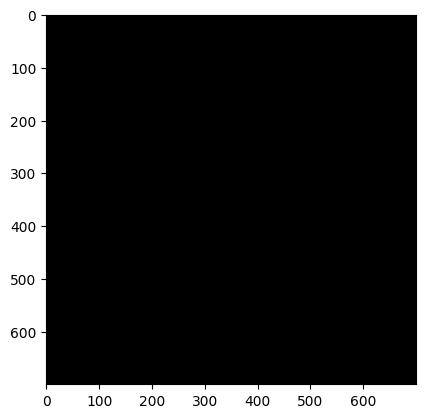

In [62]:
frames = []
for agent in env.agent_iter():
    observation, reward, termination, truncation, info = env.last()
    action = env.action_space(agent).sample() # this is where you would insert your policy
    print(f"agent: {agent} | observation: {observation.shape} | action: {action}")
    #print(f"\t observation: {observation.shape}")
    #print(f"\t action: {action}")
    frames.append(env.render())
    env.step(action)
    plt.imshow(rendered_frame)

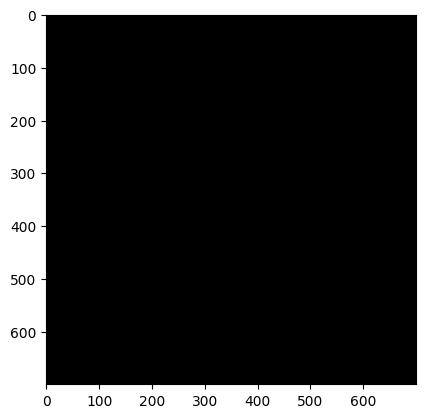

In [68]:
plt.imshow(frames[100])

In [69]:
frames[100]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)